In [2]:
#So lets Start.

In [1]:
#Importing Necessary Libraries.
import pandas as pd
import numpy as np

#Importing Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Importing Libraries and Metrics from Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


#Importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')


/home/tar-tt060-saurav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Problem Statement



We need to predict the chance of admission based on he student various scores .



--> __Feature or independent Variables




GRE Score




TOEFL Score




SOP




LOR





CGPA




Research





-->__Label/Target






Chance of Admission

In [2]:
#Now lets Importing dataset.

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
#Check dataset shape 
#and note it down

In [6]:
data.shape

(500, 9)

In [7]:
# Check how is the dataset . there is nan values or not and how standard deviation


In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


We finded Nan values 

In [9]:
#Fill Nan values

In [10]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [11]:
#Lests check Nan values filled or not

In [12]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


All Nan Value filled and we good to go .

In [13]:
#Lets Delete the unwanted columns
data.drop(columns=['Serial No.'],inplace=True)

Lets plot all features in graphs to see the continious and categories data

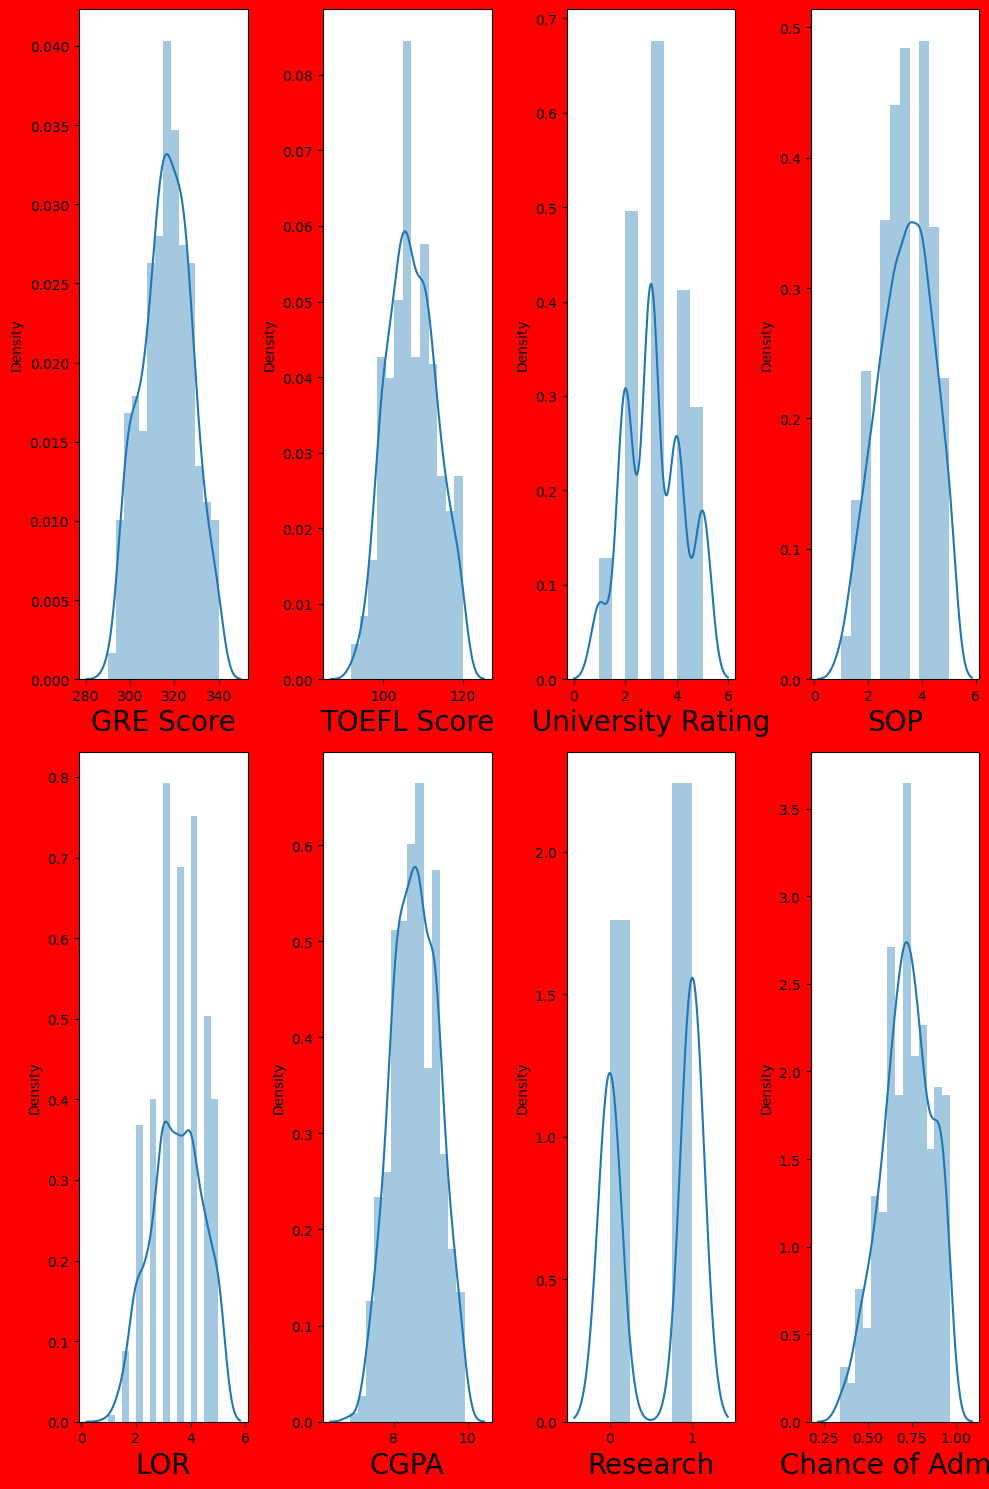

In [14]:
plt.figure(figsize=(10,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=8:
        axs=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

Write down all continious and categorical information

In [15]:
#Lest plot a graph with features vs labels

In [16]:
y=data['Chance of Admit']


In [17]:
x=data.drop(columns=['Chance of Admit'])

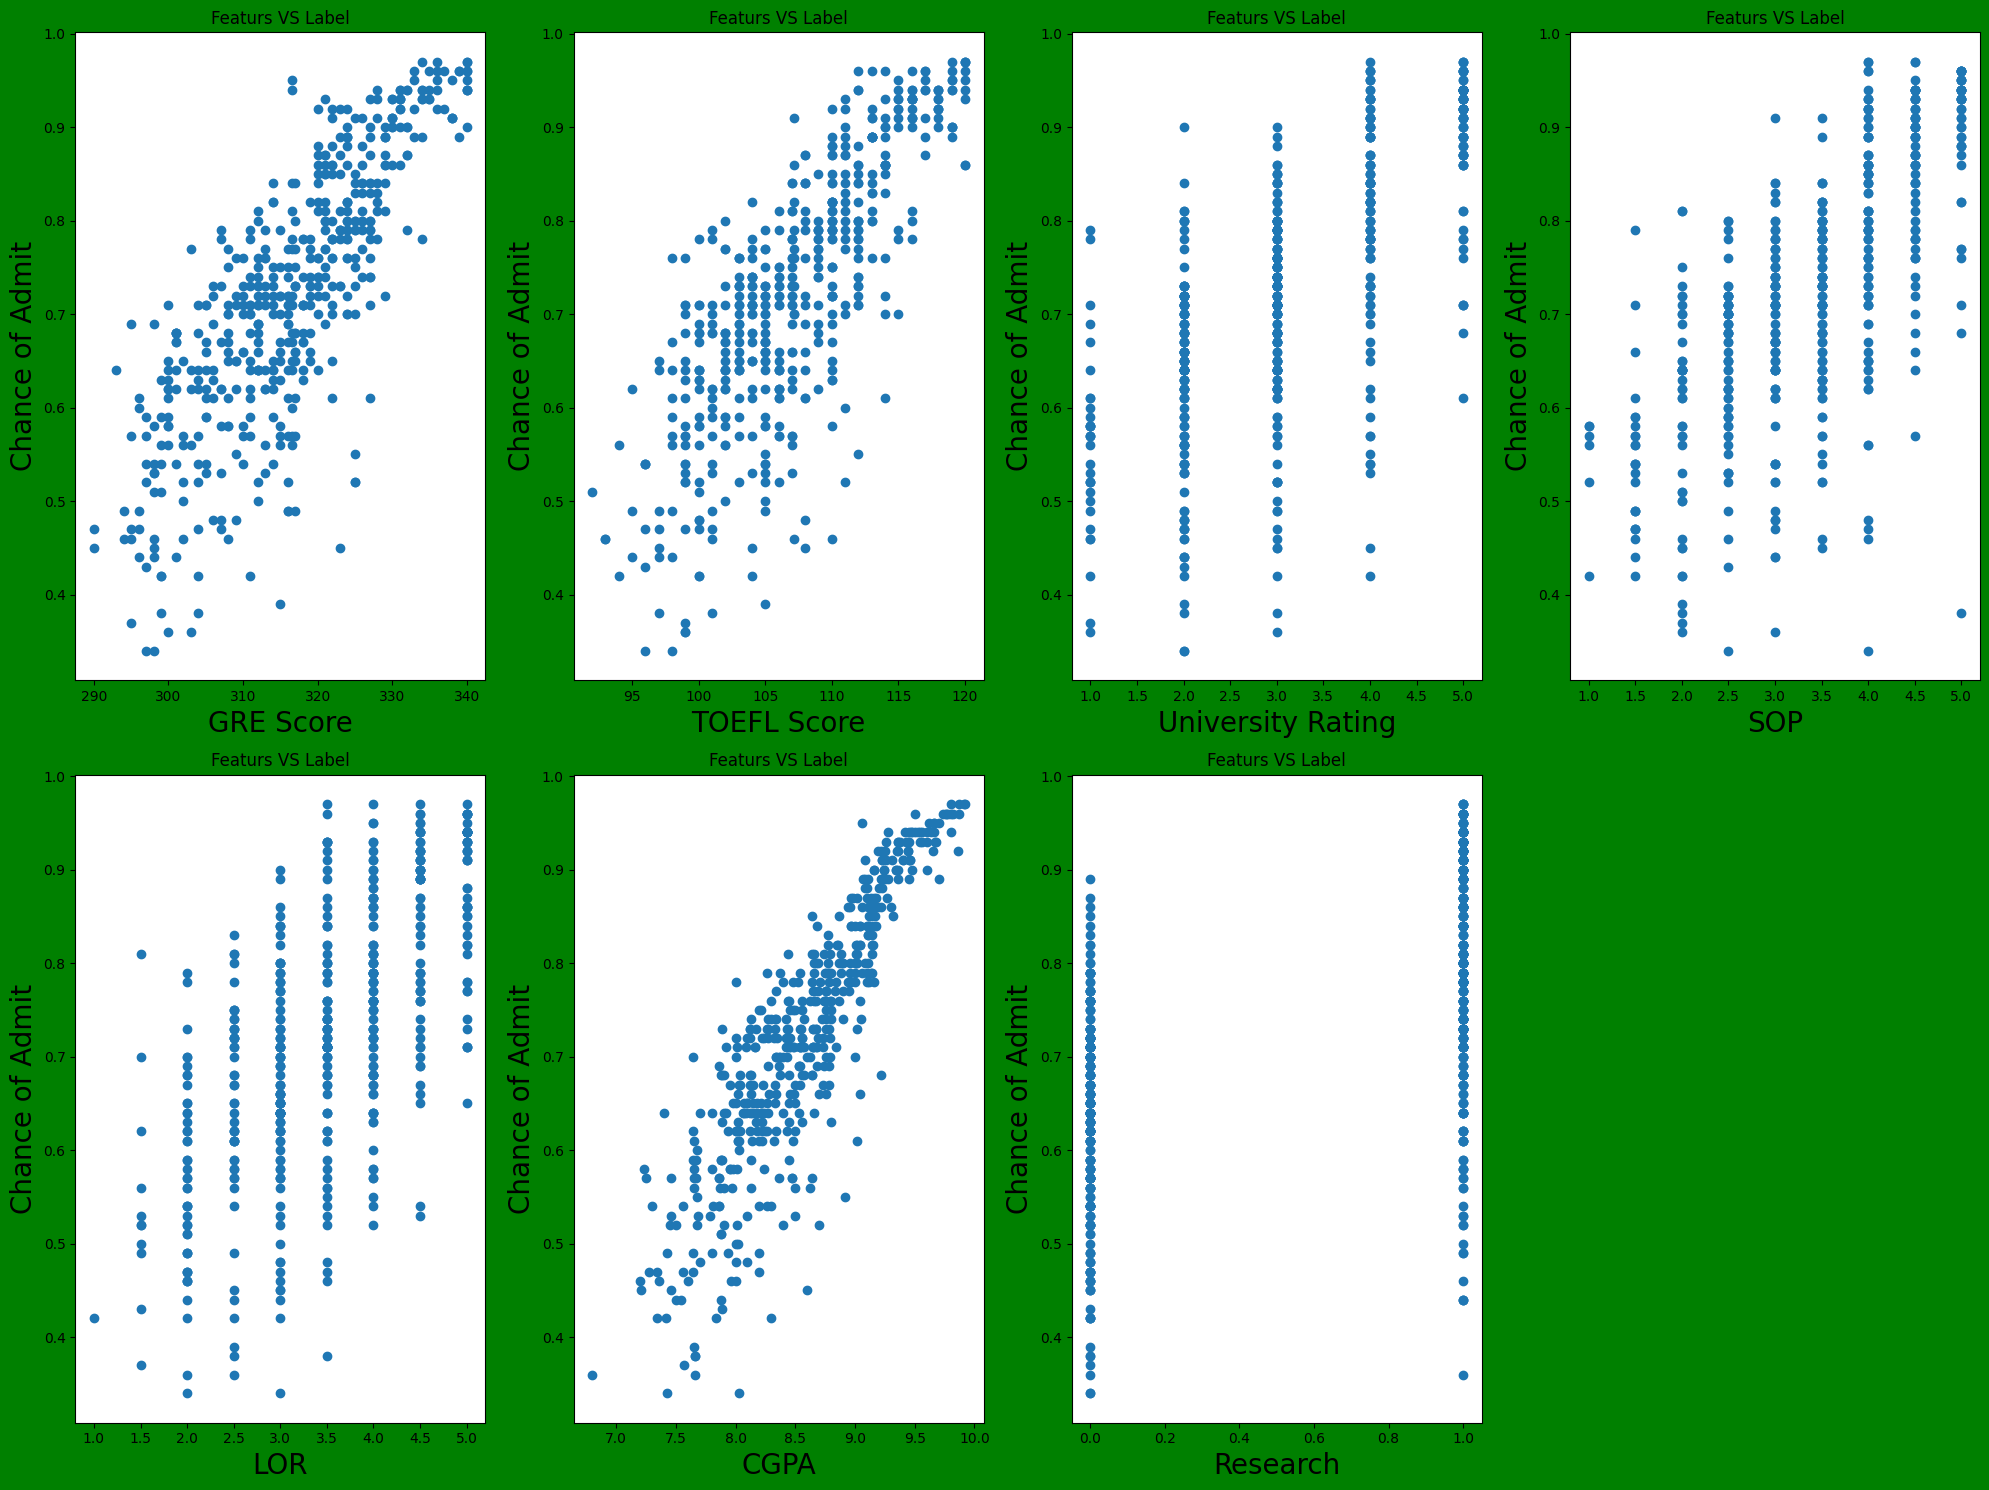

In [18]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber <=8:
        axs=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
        plt.title('Featurs VS Label')
    plotnumber +=1
plt.tight_layout()

We Find a Good Relationship. Between Fetaure and Labels

In [19]:
#Now we convert Standard Scaler 

In [20]:
scaler=StandardScaler()

In [21]:
x_scaler=scaler.fit_transform(x)

In [22]:
x_scaler

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [23]:
#Now do Train test split

In [24]:
x_train,x_test,y_train,y_test =train_test_split(x_scaler,y,test_size=0.25,random_state=(94255))

In [25]:
lm=LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression()

In [27]:
#Check with one data how good is our model

In [28]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [29]:
lm.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.82396214])

its give us answer wchich are acceptable

In [30]:
#Now check How good is our model 

In [31]:
lm.score(x_train,y_train)

0.8169623033534376

In [32]:
lm.score(x_test,y_test)

0.8265755707570167

In [33]:
#Lets Check with plotting in Graph

In [34]:
x_graph=lm.predict(x_test)

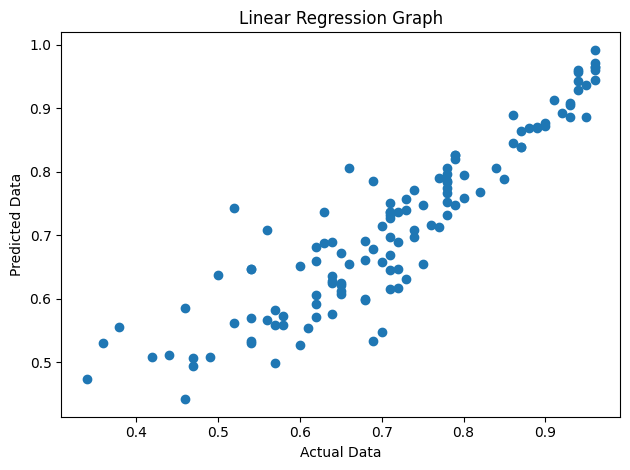

In [35]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [36]:
#Its give us it good and model we made is also good

Now lets check how much error our model can have

Use Some Metrics Like

MSE


MAE



RMSE



Before using this metrics we have to import this metrics

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
#MAE
mean_absolute_error(y_test,x_graph)

0.04404880793740277

In [39]:
#MSE
mean_squared_error(y_test,x_graph)

0.0037689828970230467

In [40]:
np.sqrt(mean_squared_error(y_test,x_graph))

0.06139204261973246

In [41]:
#This we build a Linear Regression project

# --> Now lets check if our models is overfitting our data using regularization



Lets see if our model is overfitting our training data.




# OverFitting - : 

Usually what happenns right, whenever your model gives a good acuuracy a good performance a very MAE,MSE,RMSE , we always look our model , in suspesious way we start getting doubt on our model, client will also get a doubt that, Hey this model is performing wonder full some how i fell that this model is overfitted .


ex- i am going to give you 100 question with answer and i ask you to study this , you will check question answer , you will study this and you learn and you understand everything . you know everything about 100 question. may by you learned  upto 100%  and someone learn 80% what i am trying to say that when i give question answer in you study to get trained and when i conduct exam in the exam question paper if all my trainedquestion are 90% of the question contains all the question from the learned  question . it means  what , you score high beacuse  you know everything  .and definately you got higer number ..



its also held in real time we get question paper and we know everything sometimes.its happen




Overfitting Means = you have seen the data the trained data , and test dataset also get a same kind of data what my model has seen . Just like you learned all the question and answer same question appearing similar  manner our model has learn all the data  there is a chance that same kind of a data can appear in the test data set as well my model will peform better there is chance and we have no clue that similar data will be in the test data as well we dont know we are suspecting there is a chance of your model is overtfitted. 





When your train model, your training accuracy high but after doing test then test performance is low is know as Overfitting.




# Regularization


If our model ,if you think that your model is overfitted that we are going to regularize it will try  to restrict our model to avoid that overfitting.


--> When we use regression models to train some data , there is a good chance that the model will overfit the given training dataset , regularization helps  sort this overfitting problem by restricting the degrees of freedom of a five equation i.e simply reducing the numbers of degree of polynomial function by reducing  their corresponding weight .


--> In linear equation, we do not want huge weight / coefficient  as a small change in weight can make a large difference for the dependent variables (y) . so regularization



Contraints the weight of such feature to avoid overfitting



To regularize the model a shrinkage penalty is added to the cost fucntion let see different types of regularization in regression.




- LASSO



- Ridge



- Elestic Net

# LASSO (Least Absolute Shrinkage and Selection Operator) L1

### What is LASSO?
LASSO is a regression method used to create models that predict an outcome based on several input variables. It simplifies the model by selecting only the most important variables, which can improve performance, especially when dealing with a large number of variables or data points.

### How Does LASSO Work?

- **Basic Idea**: When building a model, we often have many input variables (also called features or predictors) that we think might help predict an outcome. However, not all these variables are useful. Some might add noise or complexity without providing valuable information. LASSO helps by reducing the influence of less important variables, effectively choosing a simpler model.

- **Regularization**: LASSO applies a technique called "regularization," which involves adding a penalty to the size of the coefficients in the model. This penalty discourages the model from having too many variables with large coefficients.

- **Shrinking Coefficients**: The key feature of LASSO is that it can shrink some coefficients all the way down to zero. This effectively removes these variables from the model, performing variable selection by eliminating unnecessary ones.

- **Outcome**: The result is a model that is easier to interpret and often performs better on new, unseen data because it avoids overfitting (when a model is too complex and fits the training data too closely but fails on new data).

### Why Use LASSO?

- **Simplicity**: It makes the model simpler and easier to understand by only keeping the most important variables.
- **Performance**: It can improve the model's performance on new data by avoiding overfitting.
- **Feature Selection**: It automatically selects features, which is particularly useful when dealing with datasets with a large number of potential predictors.

### Example
Imagine you are trying to predict house prices based on various features like the size of the house, number of bedrooms, location, age of the house, and more. If you use LASSO regression, it might find that some features, like the "age of the house," do not significantly contribute to predicting the price and might assign them a coefficient of zero. As a result, those features are effectively removed from the model, simplifying it and focusing on more relevant factors like size and location.

### LASSO as L1 Regularization

LASSO is also known as L1 regularization because it penalizes the model based on the sum of the absolute values of the coefficients. The regularization term is given by:

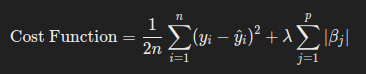

where \( \lambda \) is the shrinkage factor.

---

# Ridge Regression (L2 Regularization)

### What is Ridge Regression?
Ridge regression is a technique used in regression analysis that applies regularization to prevent overfitting and improve the model's prediction capabilities, especially in cases of multicollinearity (when independent variables are highly correlated).

### How Does Ridge Regression Work?

1. **Basic Idea**: Ridge regression aims to improve prediction accuracy and model stability by adding a penalty to the regression coefficients, particularly when the data has many correlated independent variables.

2. **Regularization (L2 Penalty)**: Ridge regression adds a regularization term to the cost function, which is the sum of the squared coefficients. This is why it is also called **L2 regularization**. The modified cost function looks like this:
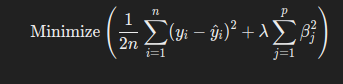

where \( \lambda \) is the regularization parameter controlling the strength of the penalty, and \( \beta_j \) represents the coefficients.

3. **Effect of Regularization**: The L2 penalty discourages large coefficients but, unlike LASSO, it does not reduce any coefficients to zero. This means all variables are retained in the model, but their coefficients are reduced.

4. **Outcome**: Ridge regression reduces the model's variance (tendency to overfit) by shrinking coefficients and improving performance on new data.

### Why Use Ridge Regression?

- **Handles Multicollinearity**: Ridge regression is particularly effective when predictors are highly correlated, as it stabilizes the coefficient estimates that could otherwise be unreliable.
- **Prevents Overfitting**: By imposing a penalty on the coefficients, ridge regression reduces the risk of overfitting, making the model more generalizable to new data.
- **Retains All Features**: Unlike LASSO, ridge regression does not set any coefficients to zero, meaning all features remain in the model but with adjusted coefficients.

### Example
Consider predicting the amount of rainfall based on several weather conditions (temperature, humidity, wind speed, etc.). If some of these weather conditions are highly correlated, using ordinary least squares (OLS) regression might lead to overfitting, where the model fits the training data too closely and performs poorly on new data.

By applying ridge regression, the model adds a penalty to the size of the coefficients, shrinking them, especially for correlated predictors. This helps create a more robust model that performs better on new data.

### Ridge Regression as L2 Regularization

Ridge Regression is known as L2 regularization because it penalizes the model based on the sum of the squares of the coefficients. The regularization term is given by:

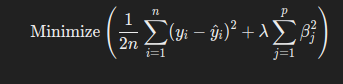

where \( \lambda \) is the regularization parameter.

---

### Key Differences Between Ridge and LASSO

- **Ridge Regression (L2 Regularization)**: Adds a penalty equal to the sum of the squared coefficients. It shrinks coefficients but does not set them to zero, so all predictors remain in the model.
  
- **LASSO Regression (L1 Regularization)**: Adds a penalty equal to the absolute sum of the coefficients. It can shrink some coefficients to zero, effectively removing some predictors from the model.

Both ridge and LASSO regressions are valuable for regularization, and the choice between them depends on the specific needs of the analysis and the nature of the data.


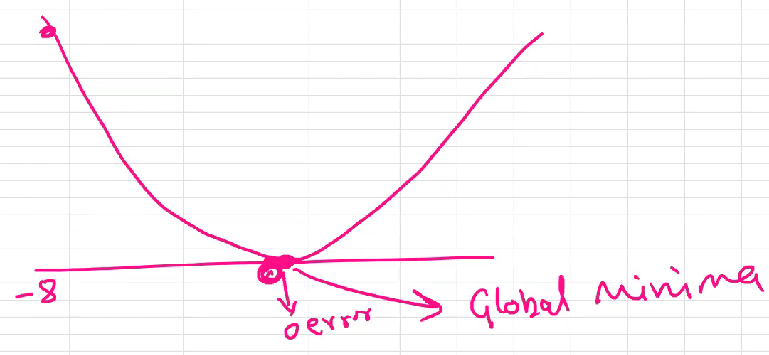

Zero error is not possible every human ,every model will make mistake nobody is 100% perfect no model in 100% perfect , but we try to achieve .. We dont know how far reach during this course of action what happens  here we are trying to understand this data . so  quickly that i want to reach global minima as quick as possible.




i dont want my model to learn so fast we are not in a hurry learn as slow as possiblle so that you reach as close as to global minima .

# Generalized Model -->

Give any test data wheather i have seen it wheather , i have not seen , i dont care , i am going to predict normal data that is called generalise model . that will work on any data or any type of data .

# Difference Between Lasso and Ridge

Supoose , Say i wanted to predict a salary , wo i will have experiance , i will have a skill , i will have a current salary , suppose current salary is 5 LPA , and 2.5 Year of Experiance and i wanted to predict Salary

And i have column  email, pincode ,  Experiance ,  Skill , Current Salary , and Prediction

Feature -email, pincode ,  Experiance ,  Skill , Current Salary 


Labels = Prediction

Email and pincode are not contributing any thing  to predict salary


# LASSO - 

If we use  a LASSO or L1 Form , so this will internally try to understand relatioship between feature and labels . it come out with a relationship which feature have realtioship with target , if any of the feature does not have any kind of relationship it will make it as if there is are do not exist . it will neglect the unwanted feature . means it will give zero importance .


LASSO  - it acts like feature selection




# Ridge - (L2) -

This also similer to L1 form but what is ridge regression or L1 form does it will give importance but very very samll , very litter importance  suppose say all important feature give 100% importance  and unwanted feature only give 0.01% importance it will give very little importance if they dont have any relatioship.



Thats is major difference between LASSO and Ridge . it does not act like a feature selection tools.


#  Why we use Regularization --


If your model is learning too fast we have to basically pull it we have to penalise , we have to make it learn  as slow as possible so that it achieve the better result thats why we need regularization.

# Lets See Practically.

In [42]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

Q -  Why i am importing this ?


Ans- Because i feel that linear regression is overfitted . now i trying to make one more model .



Remember i was talking about learning rate and which spped our model should learn how slow they should learn . how fast they should learn . so that learning rate we are going to find through Ridge CV and LassoCV .



CV - Cross Validation




we can call learning rate or λ or alpha rate.





So , How to get this learning rate first thing is we need to get the learning rate  or λ or alpha rate.

In [44]:
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm



lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

# max_iter


How many time i have to read it depends upon how big your datset .



# Normalize 



Is basically it is a very very close to standardizing the data you can say its brother and sister like similarly we have normalize , so i am saying before learning everything just normalize the data and learn

In [45]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.00014579541631124367

In [46]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00014579541631124367)

In [47]:
lasso_reg.score(x_test,y_test)

0.8266360167841778

So, what its indicate now ,why we are trying Lasso regression beacuse we thought that linear regression is overfitted here also getting a same result which means that we either use a linear regression or lasso both are giving same .it means our model has not over fitted . so that conclusion is we can make here . our model is not over fitted.

# Using Ridge Regression Model.

# Ridge will return best alpha and coefficients after performing  10 Cross validation.

In [49]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

This time applying different method here ofcourse you remove alpha = np.arange(0.001,0.1,0.0) and keep none also . we need to learn different ways .Remember i was sying that model will first try 0.001 then 0.002 then 0.003 then 0.004 and so on . it take different different learning rate and learn  during that process it will waste our time .




In our data set we have very less columns and less number of record but in real time will not have 8,9, columns we willnot have 8,9 features , we will deal with thousand of features and million of observation so that time if i use LASSO . we have to process all the data . while processing it will take lot of time because its will take memory lots of memory and the course will busy . it has to process 1 by 1 , it will waste lots our time ,why i say its wasting a time  ? its not only about time it will waste our resources (cost) directly impact our cost.



Because in your laptop or my laptop we can not train our model . we will never ever tarin in our local machine we have to connect with third party platforms. 


You hear about AWS , GCP , Azure . i will talk about that  in future .



Definatly you heard about clouds . so we have to connect with a cloud then train our model and if i am connecting to any of the cloud . i have to give monewy to AWS,GCP,Azure to train my model.



So, I am going to give a small range here . do not try all the possibilitis dont start first from end . you know what i am giving my range  in this range only you should learn what error the best out of this you have to tell. 

In [50]:
ridgecv.alpha_

0.09099999999999998

In [51]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [52]:
ridge_model.score(x_test,y_test)

0.8265637136033893

we got arounf same R2  using ridge regression as well . so its safe to say there is no overfitting.



Now , you may ask that why are ran all these models as a datascientist i am very greedy, greedy in terms of what terms of accuracy  i want good accuracy.


--> In realtime we dont build any one model . we build multiple mobel for the same problem,



--> Because every model have different behaviour , and understanding the pattern suppose one model gives 50% accurary, and another will give 60 % accuracy. i dont know when i build model then i will know when i build  model then i will know . so in that process . so in order to get more accuracy keep building a multiple models . whichever gives  the best accuracy i will pick that then i am going to use that model that happen in real time project . we dont depend only on one model,








So we can see by using different type of regularization , we still are getting the same r2 score . that means OLS model has been wee trained over the training data and there is no overfitting. 

# Lets See the underlying assumptions 
- The regression model is linear in terms of coefficeints and error term.

- The mean of the residual is zero

- The error terms are not corellated with each other  . i.e given error value ; we cannot predict the next error value.


- No , Multicollinearity , i.e no independent variables should be correlated with each other or affect one another , if there is  Multicollinearity this Precision of prediction by the ols model decrese 

- The error terms are normally distributed.

In [53]:
#AI Engineer - Saurav
#Date - 2 may 2024
#Time - 4:12 PM